#A slightly sophisticated, yet simple way to Search

Many firms like Uber, Udemy, Slack, Shopify along with other organisations used TF-IDF until as recently as 2016. After that they shifted to a slightly more sophisticated way : **BM25**, which is still used today.

So what is BM25? It stands for ‘Best match 25’ (the other 24 attempts were clearly not very successful). It was released in 1994 at the third Text Retrieval Conference, yes there really was a conference dedicated to text retrieval…

It is probably best thought of as tf-idf ‘on steroids’, implementing two key refinements:

**Term frequency saturation**. BM25 provides diminishing returns for the number of terms matched against documents. This is fairly intuitive, if you looking to search for a specific term which is very common in documents then there should become a point where the number of occurrences of this term become less useful to the search.

**Document length**. BM25 considers document length in the matching process. Again, this is intuitive; if a shorter article contains the same number of terms that match as a longer article, then the shorter article is likely to be more relevant.

These refinements also introduce two hyper-parameters to adjust the impact of these items on the ranking function. ‘k’ to tune the impact of term saturation and ‘b’ to tune document length.

Bringing this all together, BM25 is calculated as:

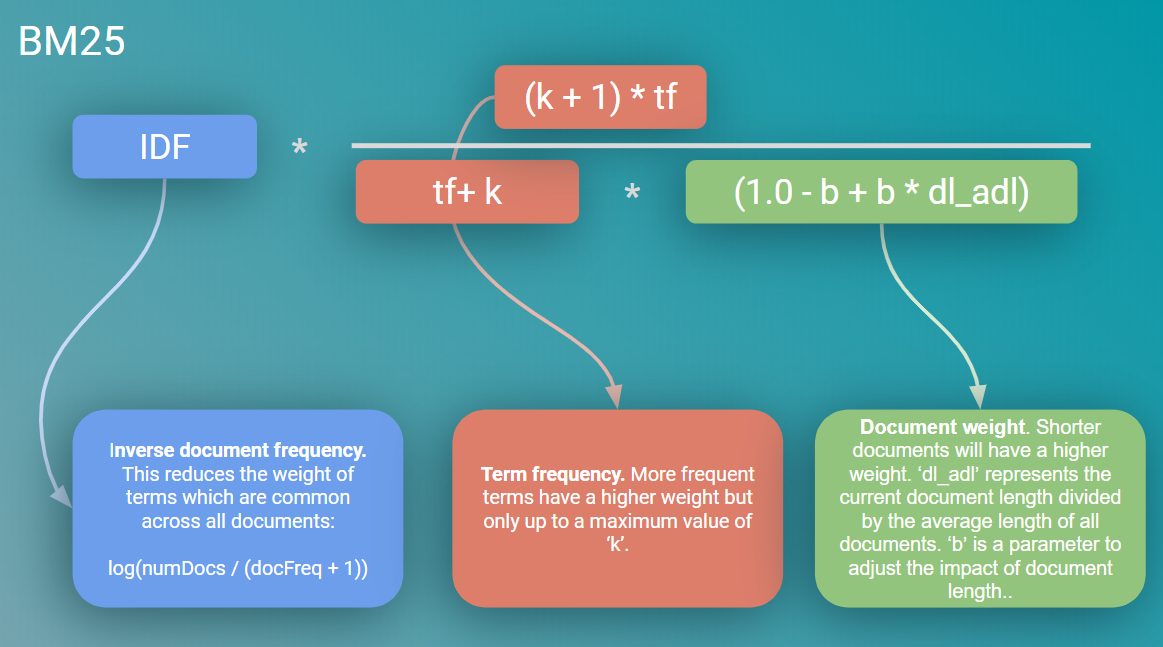


## Implementing a BM25 Model

Luckily, All of BM25's functionality is well-defined in the `rank_bm25` library.

In our example, we are going to create a search engine to query contract notices that have been published by UK public sector organisations.
Our starting point is a dateset which contains the title of a contract notice, the description along with the link to the notice itself. To keep things simple, we have combined the title and description together to create the ‘text’ column in the dataset. It is this column that we will use to search. There are 50,000 documents which we want to search across:

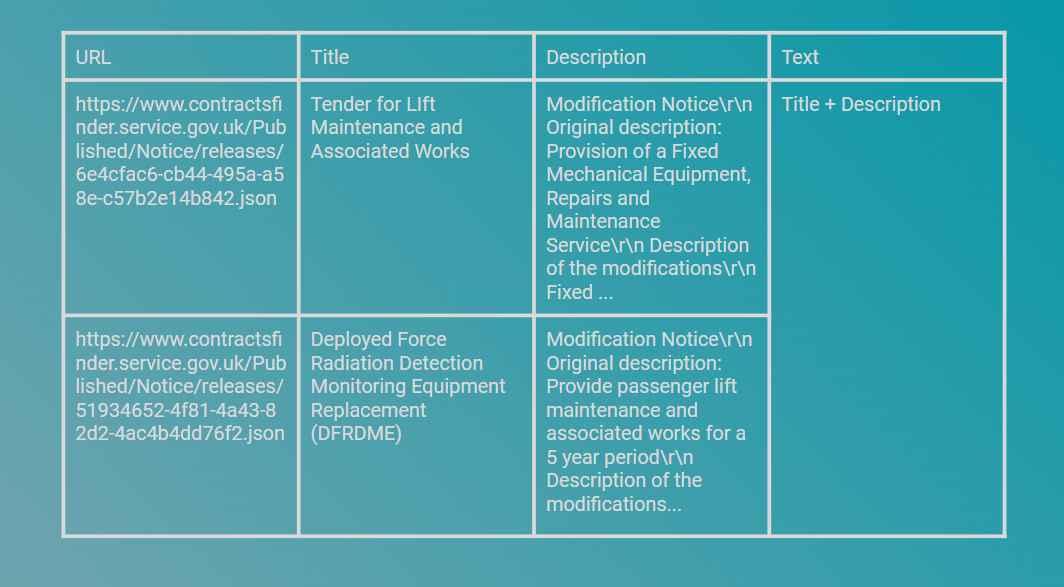

This data is available in the DATA.csv file which is made available to you.


In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
df = pd.read_csv('DATA.csv')

In [ ]:
!pip install rank_bm25

In [ ]:
# Preprocessing and Tokenizing 

import spacy
from tqdm import tqdm

nlp = spacy.load("en_core_web_sm")
tok_text=[] # for our tokenised corpus
#Tokenising using SpaCy:
for doc in tqdm(nlp.pipe(df.text.str.lower().values, disable=["tagger", "parser","ner"])):
    tok = [t.text for t in doc if t.is_alpha]
    tok_text.append(tok)

## Performing a Simple BM25 Search

In [ ]:
from rank_bm25 import BM25Okapi
bm25 = BM25Okapi(tok_text)

In [ ]:
query = "flood defence"
tokenized_query = query.lower().split(" ")
import time

t0 = time.time()
results = bm25.get_top_n(tokenized_query, df.text.values, n=3)
t1 = time.time()
print(f'Searched 50,000 records in {round(t1-t0,3) } seconds \n')
for i in results:
  print(i)

We've adapted the material from [here](https://towardsdatascience.com/how-to-build-a-search-engine-9f8ffa405eac).